# RNA Coverage Track Prediction

## What is "RNA Coverage Track"?

A track refers to a continuous signal curve along genomic coordinates.

RNA Coverage Track = A curve formed by RNA-seq read depth (coverage) at each base position on the genome.

```
Position:   1   2   3   4   5   6   7   ...
Coverage:   0   5   12  15  8   0   20 ...
```
Can be plotted as a curve (similar to BigWig format signal tracks).


## What are the key differences from "Expression Prediction"?

Unlike expression prediction, the model must learn regulatory rules such as promoters, enhancers, binding sites, splicing signals, etc., and understand transcriptional regulatory mechanisms to reproduce coverage tracks. The table below compares the key differences between the two:

| Task | Output | Granularity | Information Content |
|------|--------|-------------|-------------------|
| Expression Prediction | A single value (TPM, FPKM) | Gene-level | Coarse |
| RNA Coverage Track Prediction | Entire curve (base-level / exon-level) | Base/Structure-level | Very High |


Coverage tracks include expression levels plus the following information:
✅ Exon structure
✅ Splicing sites
✅ 5'/3' UTR usage
✅ Intron retention
✅ Alternative promoters
✅ 3' end bias and degradation


In summary, <font color="#FF0000">RNA Coverage Track Prediction = Using models to predict RNA expression signal curves at each genomic position from sequence.</font>

Its significance lies in:
✅ More fine-grained than expression levels
✅ Captures splicing, structure, and regulatory mechanisms
✅ Better understanding of variant function
✅ Simulates experimental data
✅ Key task for building high-quality genomic foundation models
✅ Supports numerous downstream functional genomics tasks


Our model is based on the pre-trained [Genos-1.2B](https://huggingface.co/BGI-HangzhouAI/Genos-1.2B), replacing the original output head with task-specific convolutional modules, using full parameter fine-tuning, and trained on public databases [ENCODE](https://www.encodeproject.org/) and [GTEx](https://www.gtexportal.org/home/) to obtain our RNA coverage track prediction model.

**Genos simulated multi-cell type RNA-seq expression levels show 0.9+ correlation with real sequencing results.**

| **Cell Type** | **Gene Strand** | **Consistency with Real RNA-seq**<br>**(Single Base Precision)** | **Consistency with Real RNA-seq**<br>**(Gene Expression Precision)** |
| --- | --- | --- | --- |
| **Human B Lymphocytes** | + | **0.933467** | 0.8641 |
| **Human B Lymphocytes** | - | 0.918187 | 0.9081 |
| **NK Natural Killer Cells** | + | **0.908418** | 0.9267 |
| **NK Natural Killer Cells** | - | 0.856171 | 0.8969 |

To better promote model services and research, we have packaged the coverage track prediction model as a service, providing APIs for quick integration. **To ensure smooth use of the service, please make sure you have completed [token](https://link) application.**


In [ ]:
# If genos is not installed in the environment, install the genos package first
# pip install genos


In [1]:
from genos import create_client

# Create client, replace with your token
client = create_client(token="<your_api_key>")


After creating the client, we can quickly call the service interface through the ```rna_coverage_track_pred``` function to perform RNA coverage track prediction


- Parameter description
    - chrom: Chromosome number, e.g., "chr1", "chr2", ..., "chrX", etc.
    - start_pos: Starting genomic base position (1-based coordinate)


In [2]:
result = client.rna_coverage_track_pred("chr6", 39407000)


RNA-seq coverage track prediction completed in 2.4649s


## Return Result Description

```yaml
{
    'position': 39407000, 
    'sequence': 'ATCGGGG...AATT", 
    'values': {
      'EFO:0002784 total RNA-seq (+)': {'value': [0.1, 0.234, ..., 0.3]},
      'EFO:0002784 total RNA-seq (-)': {'value': [0.1, 0.234, ..., 0.3]},
      'CL:0000623 total RNA-seq (+)': {'value': [0.1, 0.234, ..., 0.3]},
      'CL:0000623 total RNA-seq (-)': {'value': [0.1, 0.234, ..., 0.3]}
}
```

The return result is a dictionary containing the following fields:
- position: Starting position
- sequence: Generated REF sequence
- values: Predicted expression levels for different cells corresponding to RNA positive and negative strands at each base


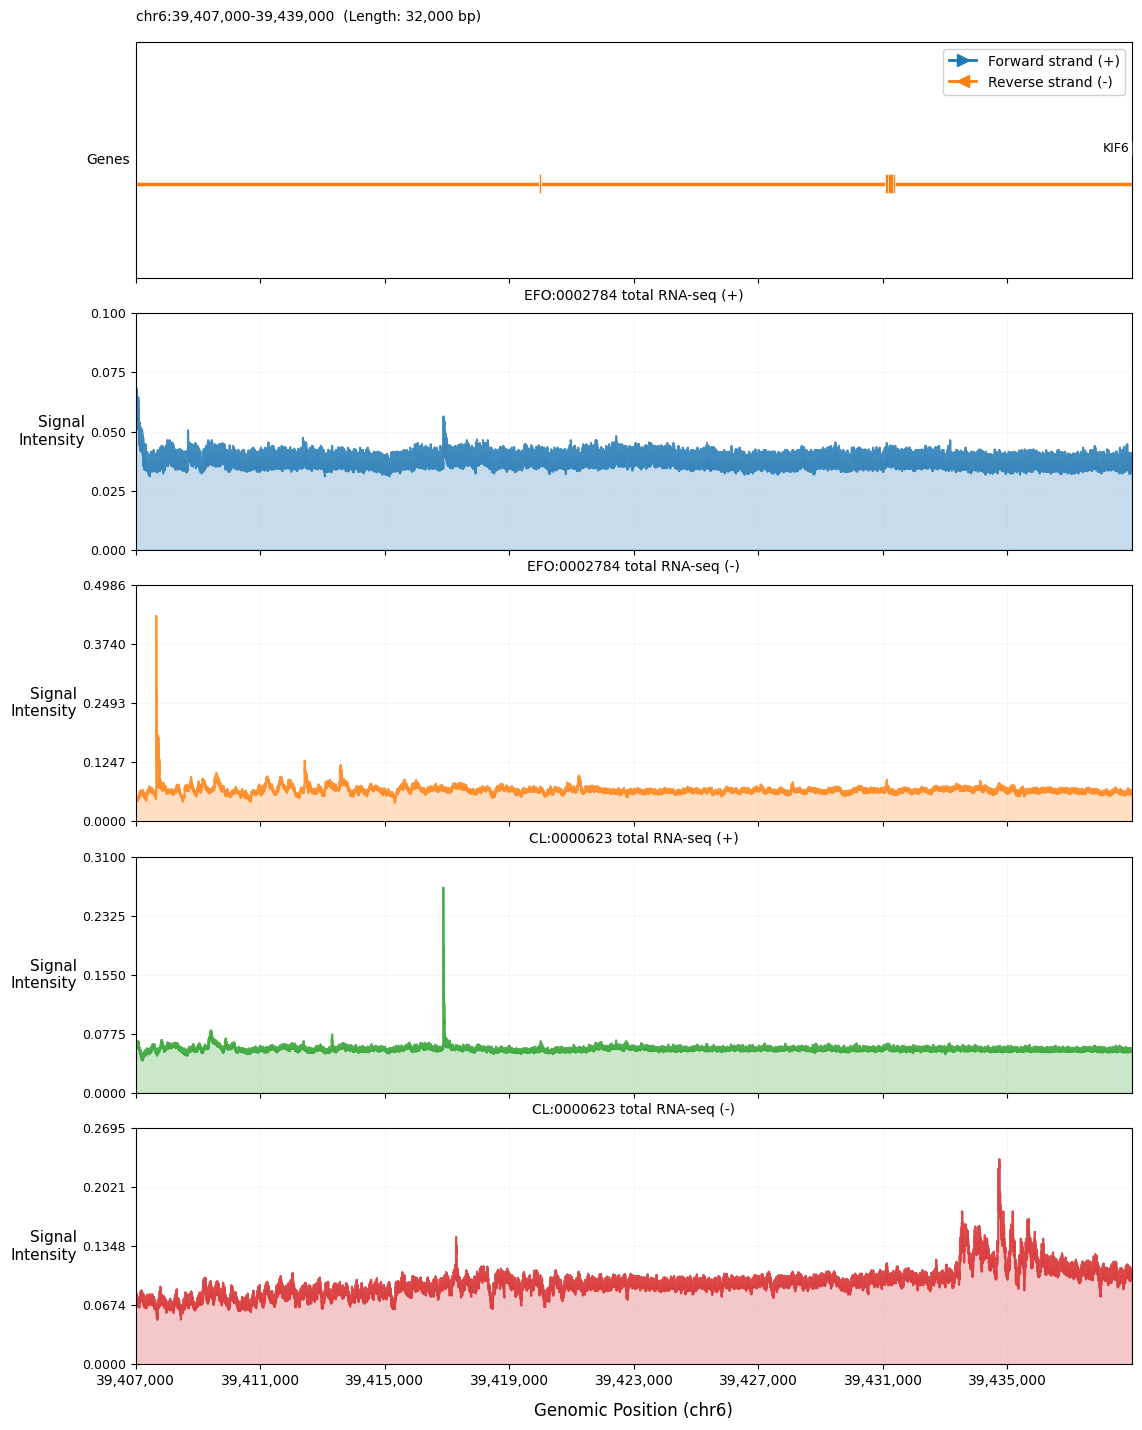

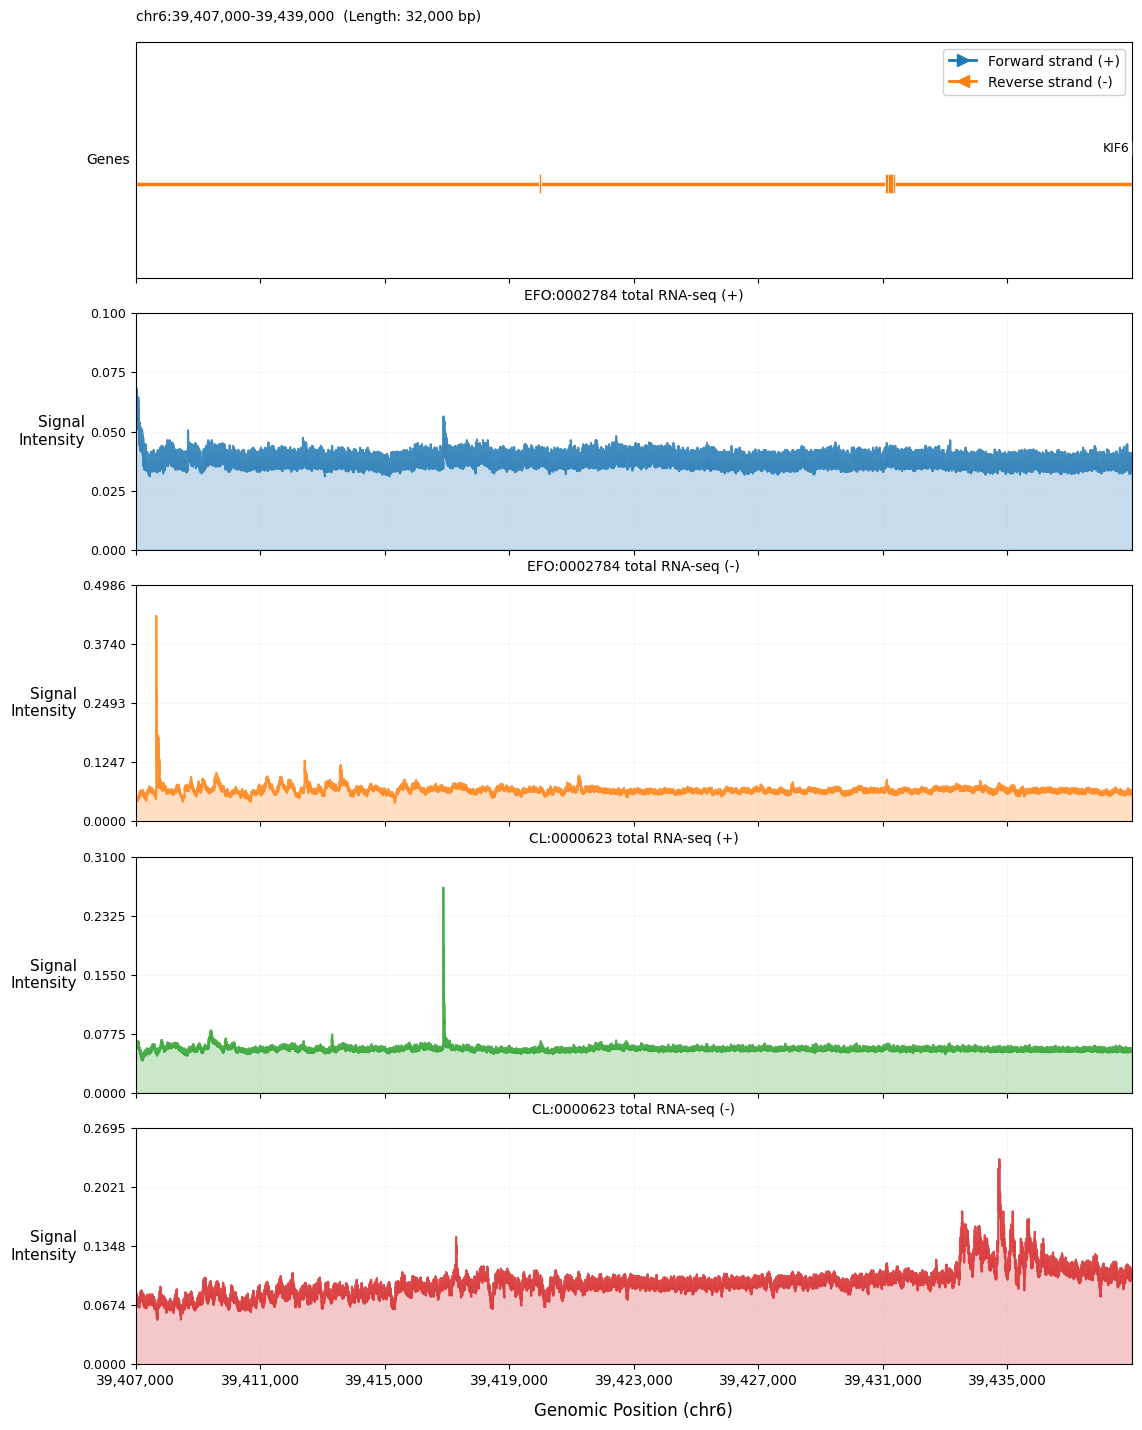

In [3]:
# Result visualization
from genos.plots.genomic_track_viewer import plot_genomic_track

plot_genomic_track(result['result'])
